In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
plt.style.use('ggplot')

In [2]:
file_path = os.path.join("data","covid")
csv_path = os.path.join(file_path,"WHO-COVID-19-global-data.csv")

In [4]:
df = pd.read_csv(csv_path)
df.columns = [col.strip() for col in df.columns]
df.loc[:,'Date_reported'] = pd.to_datetime(df.Date_reported)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70388 entries, 0 to 70387
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      70388 non-null  datetime64[ns]
 1   Country_code       70089 non-null  object        
 2   Country            70388 non-null  object        
 3   WHO_region         70388 non-null  object        
 4   New_cases          70388 non-null  int64         
 5   Cumulative_cases   70388 non-null  int64         
 6   New_deaths         70388 non-null  int64         
 7   Cumulative_deaths  70388 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 4.3+ MB


In [5]:
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [6]:
pivot_df = df.pivot(
    index='Date_reported', columns='Country', values=['New_deaths','New_cases','Cumulative_cases','Cumulative_deaths']
    )
pivot_df.head()

New_deaths                                                \
Country       Afghanistan Albania Algeria American Samoa Andorra Angola   
Date_reported                                                             
2020-01-03            0.0     0.0     0.0            0.0     0.0    0.0   
2020-01-04            0.0     0.0     0.0            0.0     0.0    0.0   
2020-01-05            0.0     0.0     0.0            0.0     0.0    0.0   
2020-01-06            0.0     0.0     0.0            0.0     0.0    0.0   
2020-01-07            0.0     0.0     0.0            0.0     0.0    0.0   

                                                              ...  \
Country       Anguilla Antigua and Barbuda Argentina Armenia  ...   
Date_reported                                                 ...   
2020-01-03         0.0                 0.0       0.0     0.0  ...   
2020-01-04         0.0                 0.0       0.0     0.0  ...   
2020-01-05         0.0                 0.0       0.0     0.0  ...   
2020-01-06         0.0                 0.0       0.0     0.0  ...   
2020-01-07         0.0                 0.0       0.0     0.0  ...   

              Cumulative_deaths                     \
Country                 Uruguay Uzbekistan Vanuatu   
Date_reported                                        
2020-01-03                  0.0        0.0     0.0   
2020-01-04                  0.0        0.0     0.0   
2020-01-05                  0.0        0.0     0.0   
2020-01-06                  0.0        0.0     0.0   
2020-01-07                  0.0        0.0     0.0   

                                                                             \
Country       Venezuela (Bolivarian Republic of) Viet Nam Wallis and Futuna   
Date_reported                                                                 
2020-01-03                                   0.0      0.0               0.0   
2020-01-04                                   0.0      0.0               0.0   
2020-01-05                                   0.0      0.0               0.0   
2020-01-06                                   0.0      0.0               0.0   
2020-01-07                                   0.0      0.0               0.0   

                                     \
Country       Yemen Zambia Zimbabwe   
Date_reported                         
2020-01-03      0.0    0.0      0.0   
2020-01-04      0.0    0.0      0.0   
2020-01-05      0.0    0.0      0.0   
2020-01-06      0.0    0.0      0.0   
2020-01-07      0.0    0.0      0.0   

                                                                        
Country       occupied Palestinian territory, including east Jerusalem  
Date_reported                                                           
2020-01-03                                                   0.0        
2020-01-04                                                   0.0        
2020-01-05                                                   0.0        
2020-01-06                                                   0.0        
2020-01-07                                                   0.0        

[5 rows x 940 columns]

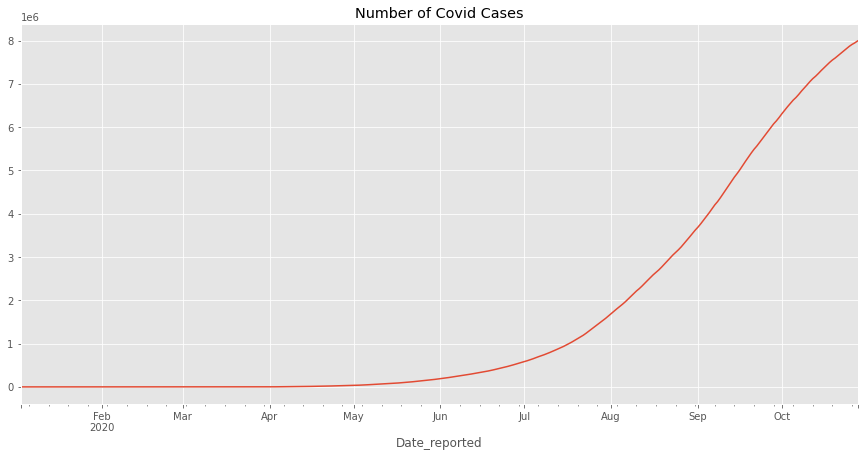

In [7]:
pivot_df.loc[:,("Cumulative_cases","India")].plot(title = 'Number of Covid Cases',figsize=(15,7))


In [11]:
# df.set_index('Date_reported', inplace=True)
#df.groupby("Country")["Cumulative_cases"].max().sort_values(ascending=False)
#df.set_index('Date_reported', inplace=True)
df.groupby("Country")["Cumulative_cases"].max().sort_values(ascending=False)

Country
United States of America    8611256
India                       7990322
Brazil                      5409854
Russian Federation          1547774
France                      1134296
                             ...   
Tonga                             0
Saint Helena                      0
Turkmenistan                      0
Tuvalu                            0
Pitcairn Islands                  0
Name: Cumulative_cases, Length: 235, dtype: int64

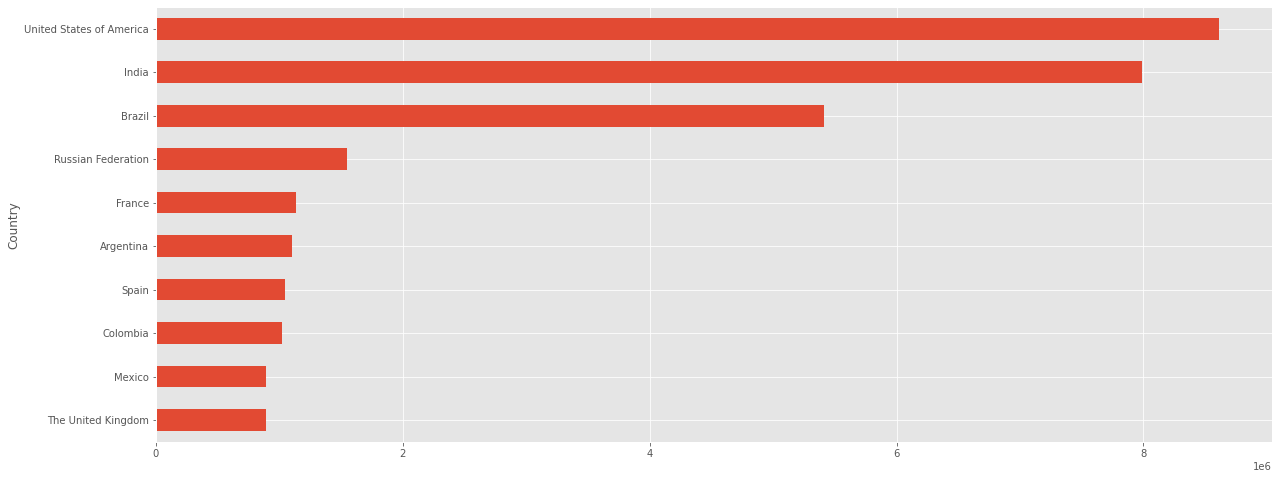

In [12]:
case_count = df.groupby("Country")["Cumulative_cases"].max().sort_values() #nvalues
case_count.tail(10).plot(kind='barh',figsize=(20, 8))

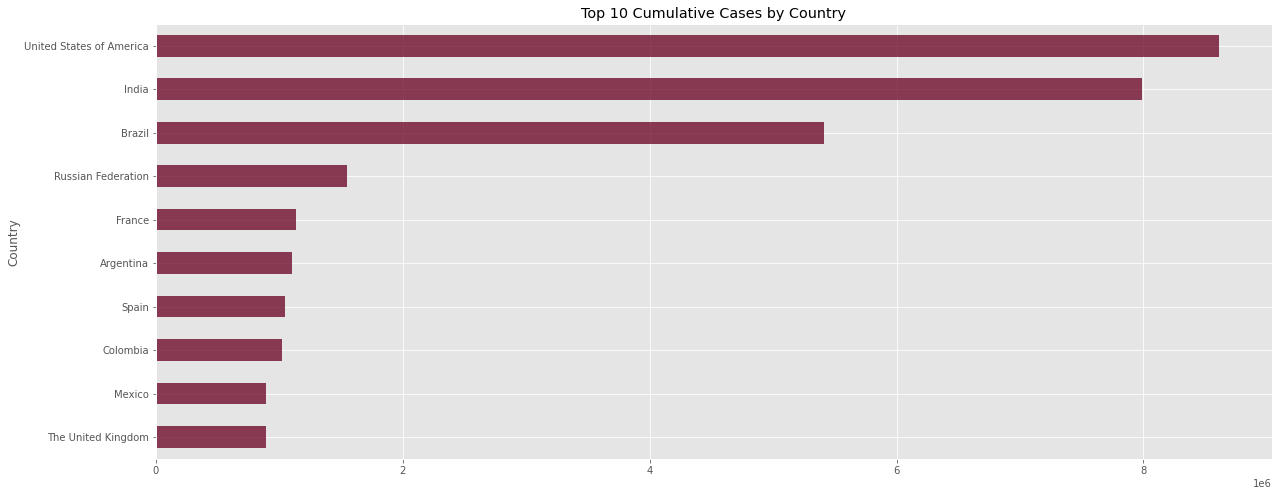

In [18]:
case_count.tail(10).plot(kind='barh',
                      figsize=(20, 8), 
                      colormap = 'RdBu', 
                      alpha=0.75,
                      title='Top 10 Cumulative Cases by Country')



Rectangle(xy=(0, -0.4), width=894694, height=0.8, angle=0)
Rectangle(xy=(0, 0.6), width=895326, height=0.8, angle=0)
Rectangle(xy=(0, 1.6), width=1.02505e+06, height=0.8, angle=0)
Rectangle(xy=(0, 2.6), width=1.04613e+06, height=0.8, angle=0)
Rectangle(xy=(0, 3.6), width=1.1023e+06, height=0.8, angle=0)
Rectangle(xy=(0, 4.6), width=1.1343e+06, height=0.8, angle=0)
Rectangle(xy=(0, 5.6), width=1.54777e+06, height=0.8, angle=0)
Rectangle(xy=(0, 6.6), width=5.40985e+06, height=0.8, angle=0)
Rectangle(xy=(0, 7.6), width=7.99032e+06, height=0.8, angle=0)
Rectangle(xy=(0, 8.6), width=8.61126e+06, height=0.8, angle=0)


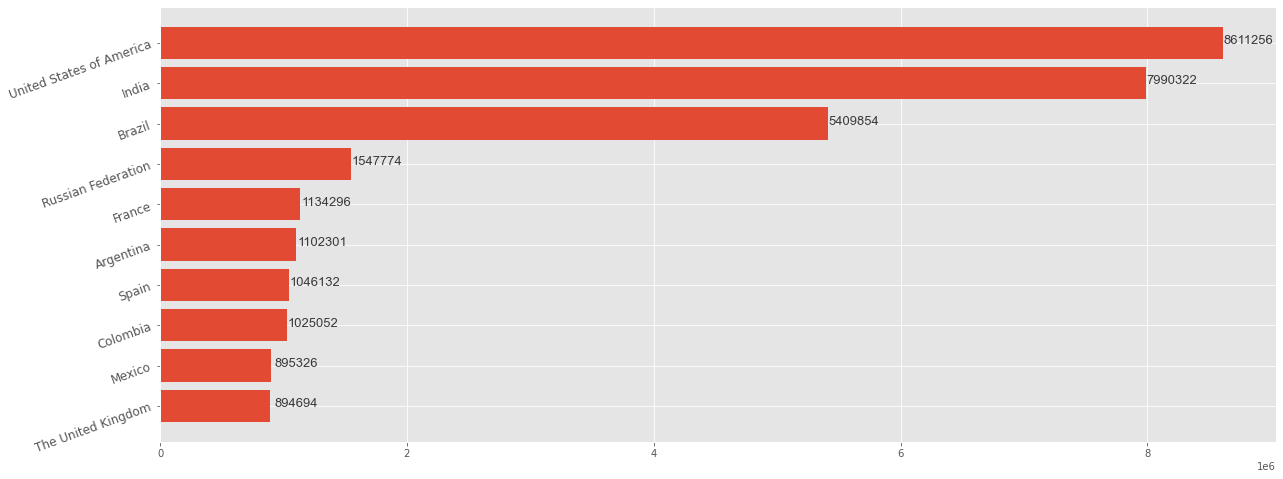

In [21]:

countries = [name for name in case_count.tail(10).index]
size_country = list(range((len(countries))))
cases = [case_count.tail(10)[case] for case in range(10)]

fig, ax = plt.subplots(figsize=(20, 8))

plt.yticks(size_country,countries, rotation=20,fontsize=12)

plot = ax.barh(size_country,cases)

for bar in plot:
    width = bar.get_width()
    ax.text(width + 210000, bar.get_y()+0.3 , f'{int(width)}', ha='center', va = 'bottom',fontsize=13,color='black',alpha=0.75,fontname='arial')
for bar in plot:
    print(bar)
    
plt.show()




In [22]:
mask_UK = df["Country_code"] == 'GB'
df_UK = df.loc[mask_UK]
df_UK = df_UK.replace(to_replace='The United Kingdom',value='United Kingdom')
df_UK = df_UK.drop(["Country_code","WHO_region"],axis=1)

In [23]:
df_UK

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,
2020-01-03,United Kingdom,0,0,0,0
2020-01-04,United Kingdom,0,0,0,0
2020-01-05,United Kingdom,0,0,0,0
2020-01-06,United Kingdom,0,0,0,0
2020-01-07,United Kingdom,0,0,0,0
...,...,...,...,...,...
2020-10-23,United Kingdom,21238,810471,189,44347
2020-10-24,United Kingdom,20531,831002,224,44571
2020-10-25,United Kingdom,23012,854014,174,44745


In [ ]:
#df_UK.set_index("Date_reported",inplace=True)

In [24]:
df_UK = df_UK.assign(Case_pct_change=df_UK["New_cases"].pct_change())
df_UK

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Case_pct_change
Date_reported,,,,,,
2020-01-03,United Kingdom,0,0,0,0,NaN
2020-01-04,United Kingdom,0,0,0,0,NaN
2020-01-05,United Kingdom,0,0,0,0,NaN
2020-01-06,United Kingdom,0,0,0,0,NaN
2020-01-07,United Kingdom,0,0,0,0,NaN
...,...,...,...,...,...,...
2020-10-23,United Kingdom,21238,810471,189,44347,-0.204182
2020-10-24,United Kingdom,20531,831002,224,44571,-0.033289
2020-10-25,United Kingdom,23012,854014,174,44745,0.120842


In [ ]:
#df_UK = df_UK.set_index("Date_reported")
#df_UK

In [25]:
type(df_UK.index)

pandas.core.indexes.datetimes.DatetimeIndex

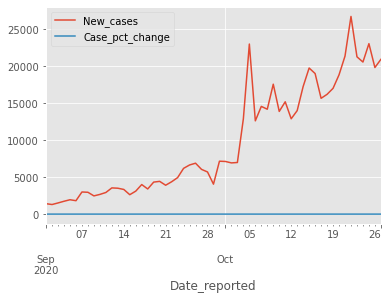

In [26]:
df_UK.loc['2020-09-01':'2020-10-27',["New_cases","Case_pct_change"]].plot()

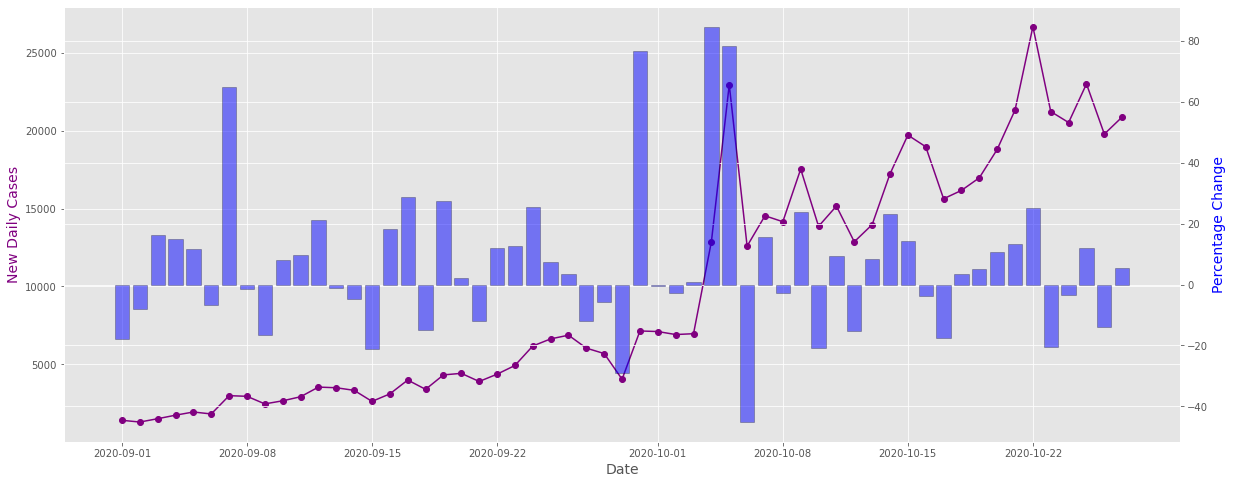

In [27]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(20, 8))
# make a plot
ax.plot(df_UK.loc['2020-09-01':'2020-10-27'].index, df_UK.loc['2020-09-01':'2020-10-27',"New_cases"], color="purple", marker="o")
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("New Daily Cases",color="purple",fontsize=14)
ax.grid(True)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.bar(df_UK.loc['2020-09-01':'2020-10-27'].index,  df_UK.loc['2020-09-01':'2020-10-27',"Case_pct_change"]*100,color="blue",edgecolor='k',alpha=0.5)
ax2.set_ylabel("Percentage Change",color="blue",fontsize=14)
ax2.grid(True)
plt.show()

### UK Mortality Rate
Ratio of total deaths to total cases

In [28]:
df_UK

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Case_pct_change
Date_reported,,,,,,
2020-01-03,United Kingdom,0,0,0,0,NaN
2020-01-04,United Kingdom,0,0,0,0,NaN
2020-01-05,United Kingdom,0,0,0,0,NaN
2020-01-06,United Kingdom,0,0,0,0,NaN
2020-01-07,United Kingdom,0,0,0,0,NaN
...,...,...,...,...,...,...
2020-10-23,United Kingdom,21238,810471,189,44347,-0.204182
2020-10-24,United Kingdom,20531,831002,224,44571,-0.033289
2020-10-25,United Kingdom,23012,854014,174,44745,0.120842


In [29]:
df_UK = df_UK.loc[(df_UK["New_cases"]!=0)]
df_UK

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Case_pct_change
Date_reported,,,,,,
2020-02-01,United Kingdom,2,2,0,0,inf
2020-02-05,United Kingdom,1,3,0,0,inf
2020-02-07,United Kingdom,1,4,0,0,inf
2020-02-10,United Kingdom,4,8,0,0,inf
2020-02-11,United Kingdom,1,9,0,0,-0.750000
...,...,...,...,...,...,...
2020-10-23,United Kingdom,21238,810471,189,44347,-0.204182
2020-10-24,United Kingdom,20531,831002,224,44571,-0.033289
2020-10-25,United Kingdom,23012,854014,174,44745,0.120842


In [30]:
df_UK = df_UK.assign(Mortality_rate=df_UK["Cumulative_deaths"]/df_UK["Cumulative_cases"]*100)
df_UK

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Case_pct_change,Mortality_rate
Date_reported,,,,,,,
2020-02-01,United Kingdom,2,2,0,0,inf,0.000000
2020-02-05,United Kingdom,1,3,0,0,inf,0.000000
2020-02-07,United Kingdom,1,4,0,0,inf,0.000000
2020-02-10,United Kingdom,4,8,0,0,inf,0.000000
2020-02-11,United Kingdom,1,9,0,0,-0.750000,0.000000
...,...,...,...,...,...,...,...
2020-10-23,United Kingdom,21238,810471,189,44347,-0.204182,5.471757
2020-10-24,United Kingdom,20531,831002,224,44571,-0.033289,5.363525
2020-10-25,United Kingdom,23012,854014,174,44745,0.120842,5.239375


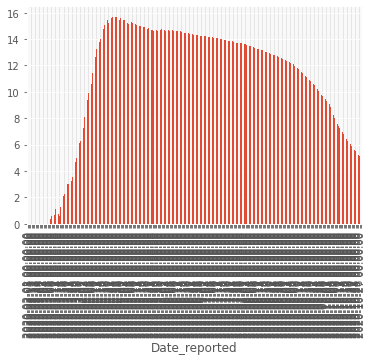

In [31]:
df_UK["Mortality_rate"].plot(kind='bar')

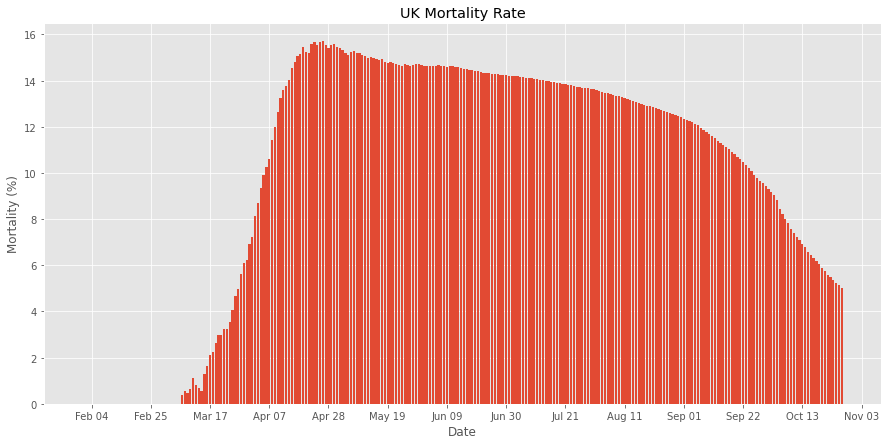

In [32]:
import matplotlib.dates as mdates
#plot data
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(df_UK.index,df_UK["Mortality_rate"])

#set ticks every 3 weeks
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=3))
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#title
ax.set(title='UK Mortality Rate', xlabel='Date', ylabel='Mortality (%)')
plt.show()

### Plotting cases of top 5 countries by case count

In [34]:
df

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...
2020-10-23,ZW,Zimbabwe,AFRO,27,8242,0,236
2020-10-24,ZW,Zimbabwe,AFRO,15,8257,0,236
2020-10-25,ZW,Zimbabwe,AFRO,12,8269,0,236


In [37]:
top_5 = ["United States of America","India","Brazil","Russian Federation","Argentina"]
df.reset_index(inplace=True)
df_top = df.pivot(
    index='Date_reported', columns='Country', values=['Cumulative_cases']
    )
df_top

Cumulative_cases                                           \
Country            Afghanistan  Albania  Algeria American Samoa Andorra   
Date_reported                                                             
2020-01-03                 0.0      0.0      0.0            0.0     0.0   
2020-01-04                 0.0      0.0      0.0            0.0     0.0   
2020-01-05                 0.0      0.0      0.0            0.0     0.0   
2020-01-06                 0.0      0.0      0.0            0.0     0.0   
2020-01-07                 0.0      0.0      0.0            0.0     0.0   
...                        ...      ...      ...            ...     ...   
2020-10-24             40687.0  18556.0  55630.0            0.0  4038.0   
2020-10-25             40768.0  18858.0  55630.0            0.0  4038.0   
2020-10-26             40833.0  19157.0  55630.0            0.0  4038.0   
2020-10-27             40937.0  19445.0  55630.0            0.0  4325.0   
2020-10-28             41032.0      NaN      NaN            0.0     NaN   

                                                                        ...  \
Country        Angola Anguilla Antigua and Barbuda  Argentina  Armenia  ...   
Date_reported                                                           ...   
2020-01-03        0.0      0.0                 0.0        0.0      0.0  ...   
2020-01-04        0.0      0.0                 0.0        0.0      0.0  ...   
2020-01-05        0.0      0.0                 0.0        0.0      0.0  ...   
2020-01-06        0.0      0.0                 0.0        0.0      0.0  ...   
2020-01-07        0.0      0.0                 0.0        0.0      0.0  ...   
...               ...      ...                 ...        ...      ...  ...   
2020-10-24     8829.0      3.0               122.0  1053650.0  75523.0  ...   
2020-10-25     9026.0      3.0               122.0  1069368.0  77837.0  ...   
2020-10-26     9381.0      3.0               124.0  1081336.0  78810.0  ...   
2020-10-27     9644.0      3.0               124.0  1090589.0  80410.0  ...   
2020-10-28        NaN      3.0               124.0  1102301.0      NaN  ...   

                                                                             \
Country       Uruguay Uzbekistan Vanuatu Venezuela (Bolivarian Republic of)   
Date_reported                                                                 
2020-01-03        0.0        0.0     0.0                                0.0   
2020-01-04        0.0        0.0     0.0                                0.0   
2020-01-05        0.0        0.0     0.0                                0.0   
2020-01-06        0.0        0.0     0.0                                0.0   
2020-01-07        0.0        0.0     0.0                                0.0   
...               ...        ...     ...                                ...   
2020-10-24     2701.0    64923.0     0.0                            88416.0   
2020-10-25     2759.0    65200.0     0.0                            88416.0   
2020-10-26     2807.0    65480.0     0.0                            89142.0   
2020-10-27     2851.0    65765.0     0.0                            89565.0   
2020-10-28     2872.0        NaN     0.0                            90047.0   

                                                                    \
Country       Viet Nam Wallis and Futuna   Yemen   Zambia Zimbabwe   
Date_reported                                                        
2020-01-03         0.0               0.0     0.0      0.0      0.0   
2020-01-04         0.0               0.0     0.0      0.0      0.0   
2020-01-05         0.0               0.0     0.0      0.0      0.0   
2020-01-06         0.0               0.0     0.0      0.0      0.0   
2020-01-07         0.0               0.0     0.0      0.0      0.0   
...                ...               ...     ...      ...      ...   
2020-10-24      1148.0               1.0  2064.0  16095.0   8257.0   
2020-10-25      1160.0               1.0  2064.0 

In [38]:
#df_top.columns.get_level_values(1)
df_top.columns

MultiIndex([('Cumulative_cases', ...),
            ('Cumulative_cases', ...),
            ('Cumulative_cases', ...),
            ('Cumulative_cases', ...),
            ('Cumulative_cases', ...),
            ('Cumulative_cases', ...),
            ('Cumulative_cases', ...),
            ('Cumulative_cases', ...),
            ('Cumulative_cases', ...),
            ('Cumulative_cases', ...),
            ...
            ('Cumulative_cases', ...),
            ('Cumulative_cases', ...),
            ('Cumulative_cases', ...),
            ('Cumulative_cases', ...),
            ('Cumulative_cases', ...),
            ('Cumulative_cases', ...),
            ('Cumulative_cases', ...),
            ('Cumulative_cases', ...),
            ('Cumulative_cases', ...),
            ('Cumulative_cases', ...)],
           names=[None, 'Country'], length=235)

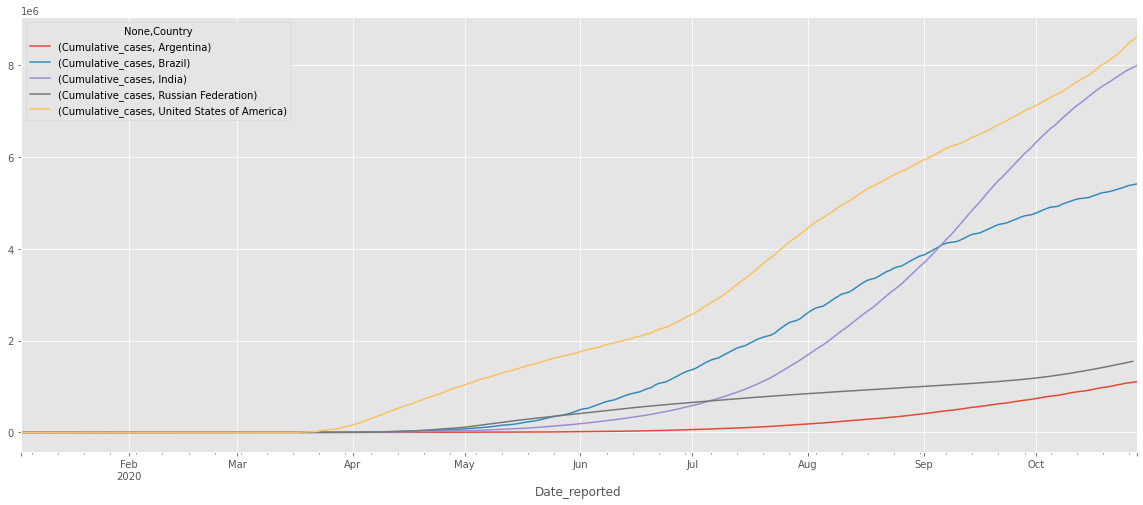

In [39]:
df_top.loc[:,("Cumulative_cases",top_5)].plot(figsize=(20, 8))

In [40]:
df_load_example = pd.read_csv(csv_path, index_col=0, parse_dates=True)
df_load_example

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...
2020-10-23,ZW,Zimbabwe,AFRO,27,8242,0,236
2020-10-24,ZW,Zimbabwe,AFRO,15,8257,0,236
2020-10-25,ZW,Zimbabwe,AFRO,12,8269,0,236


In [41]:
csv_path_1 = os.path.join(file_path,"edited-WHO-Covid_dataframe.csv")
df.to_csv(csv_path_1)